# Exploring rebalancing

In [ ]:
%pip install matplotlib pandas seaborn numpy

In [ ]:
%pip install plotly

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import plotly.graph_objects as go

In [13]:
from numpy.typing import NDArray

In [3]:
RANDOM_SEED = 666
np.random.seed(RANDOM_SEED)

In [144]:
DAYS = 260
VOLATILITY = 0.05

In [217]:
def plot_candles_OC(data, title):
    """`data` should be an ndarray of shape (days, 2);
    second axis has open and closing prices resp."""
    fig = go.Figure(data=[go.Candlestick(
        x=list(range(len(data))),
        open=data[:, 0],
        high=np.maximum(data[:, 0], data[:, 1]),
        low=np.minimum(data[:, 0], data[:, 1]),
        close=data[:, 1],
    )])

    fig.update_layout(title=title)
    fig.show()

    return fig

## Generating random prices

In [146]:
def generate_sidewaystrend_ticker_data(price_mean: float, days: int = DAYS, volatility: float = VOLATILITY) -> NDArray:
    """Volatility means the maximum percentage of change in price (from the given mean)."""
    daily_means = np.full(days, price_mean)
    return np.array([
        np.random.uniform(1 - volatility, 1 + volatility, days) * daily_means,
        np.random.uniform(1 - volatility, 1 + volatility, days) * daily_means
    ]).T


generate_sidewaystrend_ticker_data(100, days=20, volatility=0.1)

array([[101.90685343, 108.91238723],
       [ 96.60367762,  95.78410389],
       [ 95.28210172, 105.72770124],
       [ 97.25927593,  93.8165956 ],
       [ 94.32629691,  98.23846881],
       [109.85430099,  98.14719829],
       [104.20114557, 106.77571593],
       [ 94.56171157, 109.02764433],
       [ 96.5721275 , 108.22644317],
       [ 99.57081045,  95.58299026],
       [103.49683855,  98.30273338],
       [ 99.35893997,  90.1333097 ],
       [ 90.89767771, 104.20940418],
       [107.15600102,  96.68619079],
       [ 90.92602338, 105.50100868],
       [107.76379495, 104.74477921],
       [107.78947713,  91.64842275],
       [107.57670462, 104.51057245],
       [ 98.45837285,  92.46037694],
       [ 97.95269713,  96.25110154]])

In [147]:

uniform_distr_0 = generate_sidewaystrend_ticker_data(100)

_ = plot_candles_OC(uniform_distr_0, "Generated Random Prices: Sideways Trend (5% Volatility)")

In [148]:
def generate_random_uptrend_ticker_data(price_range_min: float, price_range_max: float, days: int = DAYS, volatility: float = VOLATILITY) -> NDArray:
    daily_raw_means = np.linspace(price_range_min, price_range_max, days)
    return np.array([
        daily_raw_means + (daily_raw_means * np.random.uniform(-volatility, volatility, days)),
        daily_raw_means + (daily_raw_means * np.random.uniform(-volatility, volatility, days)),
    ]).T

generate_random_uptrend_ticker_data(80, 120, 20)

array([[ 80.73668379,  82.38126264],
       [ 81.14049164,  81.8187996 ],
       [ 82.02091325,  81.14580244],
       [ 83.49946595,  84.13356307],
       [ 84.99133192,  84.86986973],
       [ 87.62698476,  90.60530243],
       [ 91.16887163,  95.85499557],
       [ 93.25759608,  97.40801889],
       [ 95.51390601,  93.94261381],
       [ 96.28516368, 102.19139454],
       [ 98.11978749, 103.23318566],
       [107.81977775, 103.21918304],
       [109.37489979, 106.6515779 ],
       [111.72774478, 103.69604522],
       [105.8007264 , 106.46351126],
       [110.83259471, 114.01391201],
       [118.23230401, 111.29369081],
       [120.22014014, 121.16114818],
       [120.73654942, 122.87682762],
       [121.09703206, 115.82691679]])

In [149]:
random_uptrend_0 = generate_random_uptrend_ticker_data(100, 120)

_ = plot_candles_OC(random_uptrend_0, "Generated Random Prices: Uptrend (5% Volatility)")


In [150]:
def generate_random_downtrend_ticker_data(price_range_min: float, price_range_max: float, days: int = DAYS, volatility: float = VOLATILITY) -> NDArray:
    daily_raw_means = np.linspace(price_range_max, price_range_min, days)
    return np.array([
        daily_raw_means - (daily_raw_means * np.random.uniform(-volatility, volatility, days)),
        daily_raw_means - (daily_raw_means * np.random.uniform(-volatility, volatility, days)),
    ]).T

In [151]:
random_downtrend_0 = generate_random_downtrend_ticker_data(80, 100)

_ = plot_candles_OC(random_downtrend_0, "Generated Random Prices: Downtrend (5% Volatility)")

In [152]:
def generate_reversal_trend_ticker_data(start_price: float, extremum_price: float, days=DAYS, volatility=VOLATILITY) -> NDArray:
    if extremum_price > start_price:
        return np.concatenate([
            generate_random_uptrend_ticker_data(start_price, extremum_price, days//2, volatility),
            generate_random_downtrend_ticker_data(start_price, extremum_price, days//2, volatility),
        ])
    elif extremum_price < start_price:
        return np.concatenate([
            generate_random_downtrend_ticker_data(extremum_price, start_price, days//2, volatility),
            generate_random_uptrend_ticker_data(extremum_price, start_price, days//2, volatility),
        ])
    else:
        raise ValueError("Extremum price should be different from the start price.")

In [153]:
random_up_then_down = generate_reversal_trend_ticker_data(100, 120)

_ = plot_candles_OC(random_up_then_down, "Generated Random Prices: Uptrend then Downtrend (5% Volatility)")

In [154]:
random_down_then_up = generate_reversal_trend_ticker_data(100, 80)
_ = plot_candles_OC(random_down_then_up, "Generated Random Prices: Downtrend then Uptrend (5% Volatility)")

## Simulate strategies

In [130]:
def baseline_long_strategy(
    starting_capital: float | int, 
    stock_prices_data: NDArray,
    portfolio_part: NDArray,
) -> NDArray:
    """
    This strategy buys at the beginning of the period and holds until the end.
    
    - `stock_prices_data` should be an ndarray of shape (n_stocks, n_days, 2)
    where the second axis has open and closing prices resp.

    - `portfolio_part` is and array of shape (n_stocks,): the part of the porfolio allocated (a number in [0, 1]) for each stock resp.

    Returns the daily portfolio value.
    """
    n_stocks = stock_prices_data.shape[0]
    n_days = stock_prices_data.shape[1]

    portfolio_value = np.zeros(n_days)

    # buy at day 0 opening only
    shares_owned = np.array([starting_capital * part / stock_prices_data[stock, 0, 0] for stock, part in enumerate(portfolio_part)])
    cash = starting_capital - np.sum([shares_owned[stock] * stock_prices_data[stock, 0, 0] for stock in range(n_stocks)])

    for day in range(n_days):   
        portfolio_value[day] = cash + np.sum([shares_owned[stock] * stock_prices_data[stock, day, 1] for stock in range(n_stocks)])
    
    return portfolio_value


In [132]:
def demon_strategy_openopen(
    starting_capital: float | int,
    stock_prices_data: NDArray,
    portfolio_part: NDArray,
) -> NDArray:
    """
    This strategy performs portoflio rebalancing every day. It buys at current day opening and sells at next day opening.

     - `stock_prices_data` should be an ndarray of shape (n_stocks, n_days, 2)
    where the second axis has open and closing prices resp.

    - `portfolio_part` is and array of shape (n_stocks,): the part of the porfolio allocated (a number in [0, 1]) for each stock resp.

    Returns the daily portfolio value.
    """
    n_stocks = stock_prices_data.shape[0]
    n_days = stock_prices_data.shape[1]

    portfolio_value = np.zeros(n_days)
    shares_owned = np.zeros(n_stocks)
    cash = starting_capital

    for day in range(n_days):
        # first, sell at opening
        cash += np.sum(shares_owned * stock_prices_data[:, day, 0])
        shares_owned = np.zeros(n_stocks)

        # then, immediately buy (rebalance)
        shares_to_buy = np.array([cash * part / stock_prices_data[stock, day, 0]
                                 for stock, part in enumerate(portfolio_part)])
        shares_owned += shares_to_buy
        cash -= np.sum(shares_to_buy * stock_prices_data[:, day, 0])

        portfolio_value[day] = cash + np.sum(shares_owned * stock_prices_data[:, day, 1])  # track closing values

    return portfolio_value

In [131]:
def demon_strategy_openclose(
    starting_capital: float | int, 
    stock_prices_data: NDArray,
    portfolio_part: NDArray,
) -> NDArray:
    """
    This strategy performs portoflio rebalancing every day. It buys at openings and sells at closings.

     - `stock_prices_data` should be an ndarray of shape (n_stocks, n_days, 2)
    where the second axis has open and closing prices resp.

    - `portfolio_part` is and array of shape (n_stocks,): the part of the porfolio allocated (a number in [0, 1]) for each stock resp.

    Returns the daily portfolio value.
    """
    n_stocks = stock_prices_data.shape[0]
    n_days = stock_prices_data.shape[1]

    portfolio_value = np.zeros(n_days)
    shares_owned = np.zeros(n_stocks)
    cash = starting_capital

    for day in range(n_days):
        # buy at open
        shares_to_buy = np.array([cash * part / stock_prices_data[stock, day, 0] for stock, part in enumerate(portfolio_part)])
        shares_owned += shares_to_buy
        cash -= np.sum(shares_to_buy * stock_prices_data[:, day, 0])

        # sell at close
        cash += np.sum(shares_owned * stock_prices_data[:, day, 1])
        shares_owned = np.zeros(n_stocks)
        
        portfolio_value[day] = cash

    return portfolio_value

In [305]:
def plot_portfolio(portfolio_values, stocks_data, title):
    n_days = stocks_data.shape[1]
    days = np.arange(n_days)
    plt.figure(figsize=(10, 6))
    for i in range(stocks_data.shape[0]):
        plt.plot(days, stocks_data[i, :, 1], label=f'Stock {i} Close Price')
    plt.plot(days, portfolio_values, label='Portfolio Value', color='black')
    plt.title(title)
    plt.xlabel('Day (idx)')
    plt.ylabel('Value at end of each day ($)')
    plt.legend()
    plt.show()

In [306]:
TEST_1_SIDEWAYS = {
    "starting_capital": 100,
    "stock_prices_data": np.array([uniform_distr_0]),
    "portfolio_part": np.array([1.0]),
}

TEST_3_SIDEWAYS = {
    "starting_capital": 100,
    "stock_prices_data": np.array([
        generate_sidewaystrend_ticker_data(100),
        generate_sidewaystrend_ticker_data(100),
        generate_sidewaystrend_ticker_data(100),
    ]),
    "portfolio_part": np.array([0.333, 0.333, 0.333]),
}
TEST_10_SIDEWAYS = {
    "starting_capital": 100,
    "stock_prices_data": np.array([
        generate_sidewaystrend_ticker_data(100)
        for _ in range(10)
    ]),
    "portfolio_part": np.array([0.1] * 10),
}

TEST_1_UPTREND = {
    "starting_capital": 100,
    "stock_prices_data": np.array([random_uptrend_0]),
    "portfolio_part": np.array([1.0]),
}
TEST_3_UPTREND = {
    "starting_capital": 100,
    "stock_prices_data": np.array([
        generate_random_uptrend_ticker_data(100, 120),
        generate_random_uptrend_ticker_data(100, 120),
        generate_random_uptrend_ticker_data(100, 120),
    ]),
    "portfolio_part": np.array([0.333, 0.333, 0.333]),
}
TEST_10_UPTREND = {
    "starting_capital": 100,
    "stock_prices_data": np.array([
        generate_random_uptrend_ticker_data(100, 120)
        for _ in range(10)
    ]),
    "portfolio_part": np.array([0.1] * 10),
}

TEST_1_DOWNTREND = {
    "starting_capital": 100,
    "stock_prices_data": np.array([random_downtrend_0]),
    "portfolio_part": np.array([1.0]),
}
TEST_3_DOWNTREND = {
    "starting_capital": 100,
    "stock_prices_data": np.array([
        generate_random_downtrend_ticker_data(80, 100),
        generate_random_downtrend_ticker_data(80, 100),
        generate_random_downtrend_ticker_data(80, 100),
    ]),
    "portfolio_part": np.array([0.333, 0.333, 0.333]),
}
TEST_10_DOWNTREND = {
    "starting_capital": 100,
    "stock_prices_data": np.array([
        generate_random_downtrend_ticker_data(80, 100)
        for _ in range(10)
    ]),
    "portfolio_part": np.array([0.1] * 10),
}

TEST_3_MIXED = {
    "starting_capital": 100,
    "stock_prices_data": np.array([
        random_downtrend_0,
        uniform_distr_0,
        random_uptrend_0,
    ]),
    "portfolio_part": np.array([0.333, 0.333, 0.333]),
}
TEST_9_MIXED = {
    "starting_capital": 100,
    "stock_prices_data": np.array([
        generate_random_downtrend_ticker_data(80, 100),
        generate_sidewaystrend_ticker_data(100),
        generate_random_uptrend_ticker_data(100, 120),
        generate_random_downtrend_ticker_data(80, 100),
        generate_sidewaystrend_ticker_data(100),
        generate_random_uptrend_ticker_data(100, 120),
        generate_random_downtrend_ticker_data(80, 100),
        generate_sidewaystrend_ticker_data(100),
        generate_random_uptrend_ticker_data(100, 120),
    ]),
    "portfolio_part": np.array([0.111] * 9),
}

TEST_2_REVERSED = {
    "starting_capital": 100,
    "stock_prices_data": np.array([
        random_up_then_down,
        random_down_then_up,
    ]),
    "portfolio_part": np.array([0.5, 0.5]),
}

TEST_8_REVERSED = {
    "starting_capital": 100,
    "stock_prices_data": np.array([
        generate_reversal_trend_ticker_data(100, 120)
        for _ in range(4)
    ] + [
        generate_reversal_trend_ticker_data(100, 80)
        for _ in range(4)
    ]),
    "portfolio_part": np.array([0.125] * 8),
}

TEST_5_MIXED = {
    "starting_capital": 100,
    "stock_prices_data": np.array([
        random_downtrend_0,
        uniform_distr_0,
        random_uptrend_0,
        random_up_then_down,
        random_down_then_up,
    ]),
    "portfolio_part": np.array([0.2] * 5),
}

TEST_50_MIXED = {
    "starting_capital": 100,
    "stock_prices_data": np.array([
        generate_sidewaystrend_ticker_data(100)
        for _ in range(10)
    ] + [
        generate_random_uptrend_ticker_data(100, 120)
        for _ in range(10)
    ] + [
        generate_random_downtrend_ticker_data(80, 100)
        for _ in range(10)
    ] + [
        generate_reversal_trend_ticker_data(100, 120)
        for _ in range(10)
    ] + [
        generate_reversal_trend_ticker_data(100, 80)
        for _ in range(10)
    ]),
    "portfolio_part": np.array([0.02] * 50),
}

TEST_2_LOWVOLUPTREND_VS_HIVOLDOWNTREND = {
    "starting_capital": 100,
    "stock_prices_data": np.array([
        generate_random_uptrend_ticker_data(100, 115, volatility=0.01),
        generate_random_downtrend_ticker_data(80, 100, volatility=0.05),
    ]),
    "portfolio_part": np.array([0.5, 0.5]),
}

In [307]:
def simulate_and_compare_strategies(simulation_params: dict):
    baseline_portfolio = baseline_long_strategy(**simulation_params)
    demon_openopen_portfolio = demon_strategy_openopen(**simulation_params)
    demon_openclose_portfolio = demon_strategy_openclose(**simulation_params)

    stocks_data = simulation_params["stock_prices_data"]

    plot_portfolio(baseline_portfolio, stocks_data, 'Baseline Long Strategy')
    plot_portfolio(demon_openopen_portfolio, stocks_data, 'Demon Strategy (Open-Open)')
    plot_portfolio(demon_openclose_portfolio, stocks_data, 'Demon Strategy (Open-Close)')

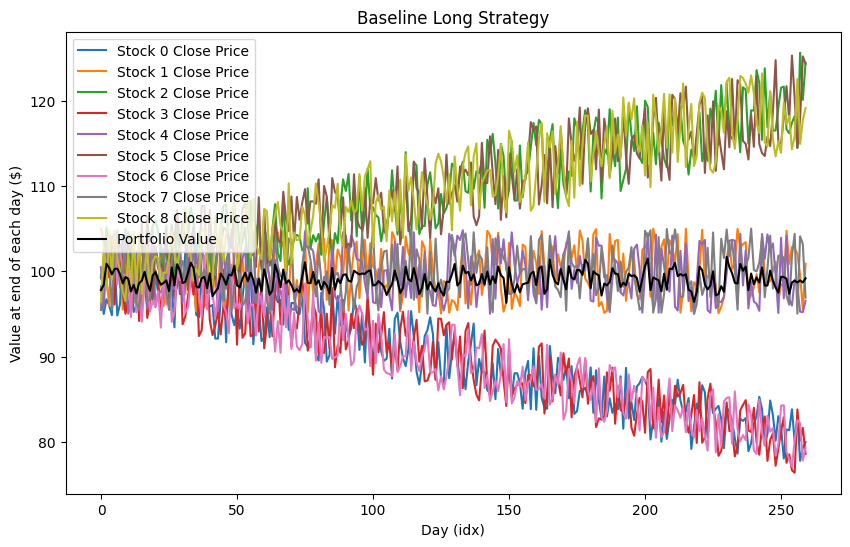

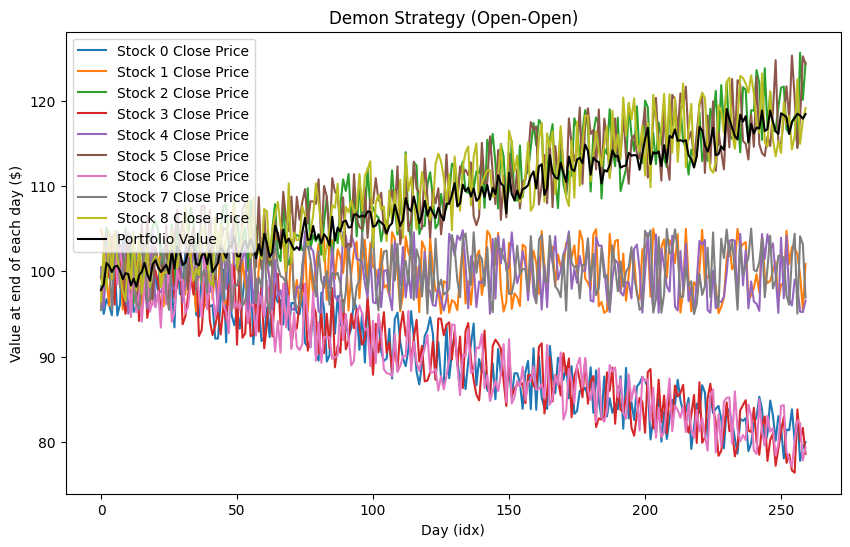

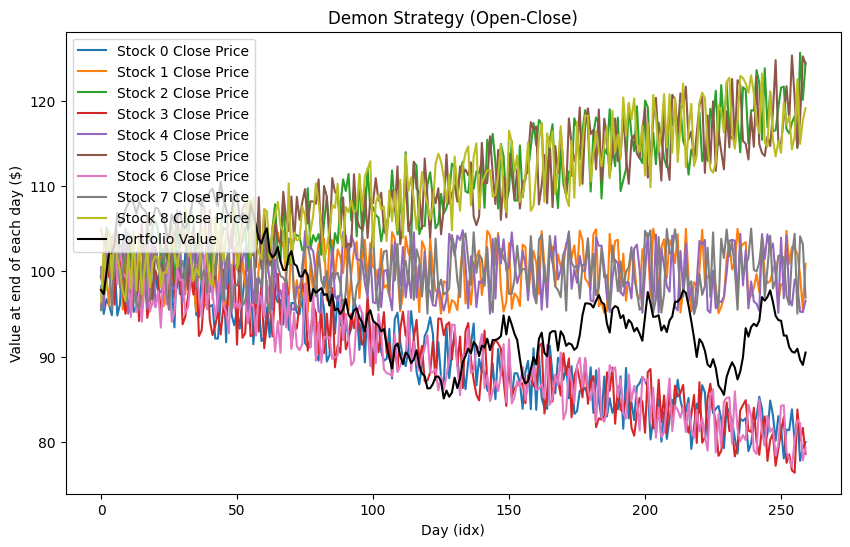

In [308]:
simulation_params = TEST_9_MIXED
simulate_and_compare_strategies(simulation_params)

## Backtesting

In [194]:
%pip install alpaca-py

  Using cached msgpack-1.1.0-cp311-cp311-win_amd64.whl.metadata (8.6 kB)
  Using cached websockets-14.1-cp311-cp311-win_amd64.whl.metadata (6.9 kB)
   ---------------------------------------- 0.0/120.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/120.4 kB ? eta -:--:--
   ------------------------------------- -- 112.6/120.4 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 120.4/120.4 kB 1.4 MB/s eta 0:00:00
Using cached msgpack-1.1.0-cp311-cp311-win_amd64.whl (74 kB)
Using cached websockets-14.1-cp311-cp311-win_amd64.whl (163 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [309]:
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.enums import Adjustment
from alpaca.data.timeframe import TimeFrame

In [310]:
import dotenv
dotenv.load_dotenv()

True

In [311]:
import os

In [312]:
ALPACA_PAPER_API_KEY = os.getenv("ALPACA_PAPER_API_KEY")
ALPACA_PAPER_SECRET_KEY = os.getenv("ALPACA_PAPER_SECRET_KEY")

if ALPACA_PAPER_API_KEY is None or ALPACA_PAPER_SECRET_KEY is None:
    raise ValueError("API keys not found in environment variables.")

In [313]:
client = StockHistoricalDataClient(api_key=ALPACA_PAPER_API_KEY, secret_key=ALPACA_PAPER_SECRET_KEY)

In [314]:
from datetime import datetime

In [315]:
ALL_TICKERS = ["AAPL", "NVDA", "TSLA", "INTC"]

In [316]:
daily_historical_request = StockBarsRequest(
    symbol_or_symbols=ALL_TICKERS,
    timeframe=TimeFrame.Day,
    start=datetime(2017, 1, 1),
    end=datetime(2024, 12, 1),
    adjustment=Adjustment.ALL,
)

daily_historical_data = client.get_stock_bars(daily_historical_request)
df = daily_historical_data.df

df.head()

open   high    low  close       volume  \
symbol timestamp                                                            
AAPL   2017-01-03 05:00:00+00:00  26.76  26.89  26.53  26.85  126853276.0   
       2017-01-04 05:00:00+00:00  26.79  26.94  26.76  26.82   92937796.0   
       2017-01-05 05:00:00+00:00  26.81  27.02  26.77  26.96   94290148.0   
       2017-01-06 05:00:00+00:00  26.99  27.32  26.93  27.26  135655836.0   
       2017-01-09 05:00:00+00:00  27.28  27.61  27.27  27.51  145050444.0   

                                  trade_count   vwap  
symbol timestamp                                      
AAPL   2017-01-03 05:00:00+00:00     158508.0  26.74  
       2017-01-04 05:00:00+00:00     129948.0  26.85  
       2017-01-05 05:00:00+00:00     136223.0  26.92  
       2017-01-06 05:00:00+00:00     177799.0  27.22  
       2017-01-09 05:00:00+00:00     184632.0  27.50

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7964 entries, ('AAPL', Timestamp('2017-01-03 05:00:00+0000', tz='UTC')) to ('TSLA', Timestamp('2024-11-29 05:00:00+0000', tz='UTC'))
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         7964 non-null   float64
 1   high         7964 non-null   float64
 2   low          7964 non-null   float64
 3   close        7964 non-null   float64
 4   volume       7964 non-null   float64
 5   trade_count  7964 non-null   float64
 6   vwap         7964 non-null   float64
dtypes: float64(7)
memory usage: 539.3+ KB


In [318]:
def extract_ticker_array_from_df(df: pd.DataFrame, symbol: str) -> NDArray:
    """Returns an ndarray of shape (days, 2) with open and closing prices resp."""
    return df.loc[df.index.get_level_values("symbol") == symbol, ["open", "close"]].values

sample_ticker = "INTC"
ticker_data = extract_ticker_array_from_df(df, sample_ticker)
ticker_data.shape

(1991, 2)

In [319]:
_ = plot_candles_OC(ticker_data, f"{sample_ticker} Stock Price (1 Jan 2017 - 20 Dec 2024)")

In [320]:
df.groupby("symbol").count()

,open,high,low,close,volume,trade_count,vwap
symbol,,,,,,,
AAPL,1991,1991,1991,1991,1991,1991,1991
INTC,1991,1991,1991,1991,1991,1991,1991
NVDA,1991,1991,1991,1991,1991,1991,1991
TSLA,1991,1991,1991,1991,1991,1991,1991


In [321]:
df.index.get_level_values("timestamp").value_counts().value_counts()

count
4    1991
Name: count, dtype: int64

In [326]:
BACKTEST_DATA_ALL = {
    "starting_capital": 100,
    "stock_prices_data": np.array([
        extract_ticker_array_from_df(df, ticker)
        for ticker in ALL_TICKERS
    ]),
    "portfolio_part": np.array([1/len(ALL_TICKERS)] * len(ALL_TICKERS)),
}

df_2020 = df.loc[df.index.get_level_values("timestamp").year == 2020]
BACKTEST_DATA_2020 = {
    "starting_capital": 100,
    "stock_prices_data": np.array([
        extract_ticker_array_from_df(df_2020, ticker)
        for ticker in ALL_TICKERS
    ]),
    "portfolio_part": np.array([1/len(ALL_TICKERS)] * len(ALL_TICKERS)),
}

df_2022 = df.loc[df.index.get_level_values("timestamp").year == 2022]
BACKTEST_DATA_2022 = {
    "starting_capital": 100,
    "stock_prices_data": np.array([
        extract_ticker_array_from_df(df_2022, ticker)
        for ticker in ALL_TICKERS
    ]),
    "portfolio_part": np.array([1/len(ALL_TICKERS)] * len(ALL_TICKERS)),
}

df_2023 = df.loc[df.index.get_level_values("timestamp").year == 2023]
BACKTEST_DATA_2023 = {
    "starting_capital": 100,
    "stock_prices_data": np.array([
        extract_ticker_array_from_df(df_2023, ticker)
        for ticker in ALL_TICKERS
    ]),
    "portfolio_part": np.array([1/len(ALL_TICKERS)] * len(ALL_TICKERS)),
}

df_2024 = df.loc[df.index.get_level_values("timestamp").year == 2024]
BACKTEST_DATA_2024 = {
    "starting_capital": 100,
    "stock_prices_data": np.array([
        extract_ticker_array_from_df(df_2024, ticker)
        for ticker in ALL_TICKERS
    ]),
    "portfolio_part": np.array([1/len(ALL_TICKERS)] * len(ALL_TICKERS)),
}

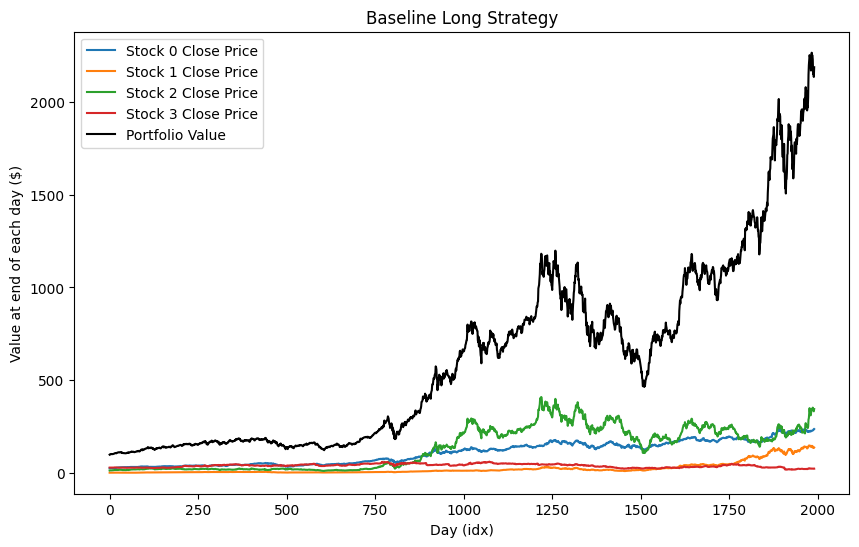

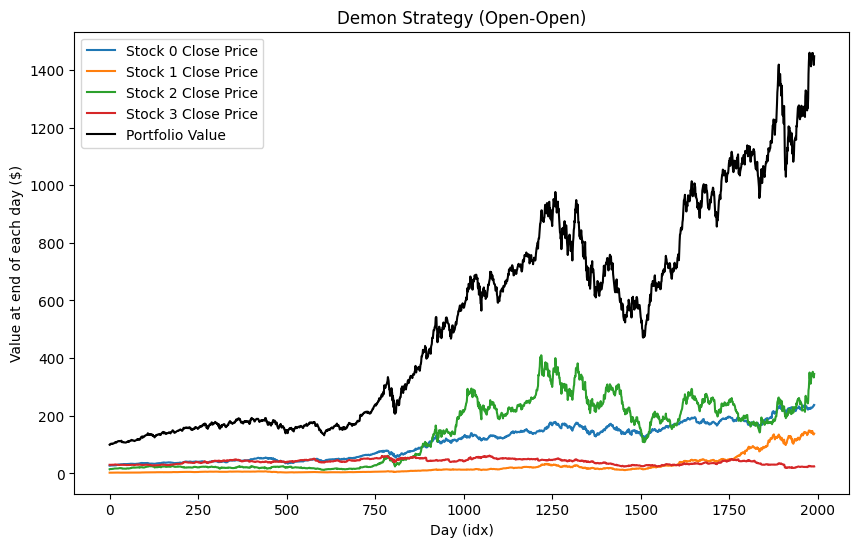

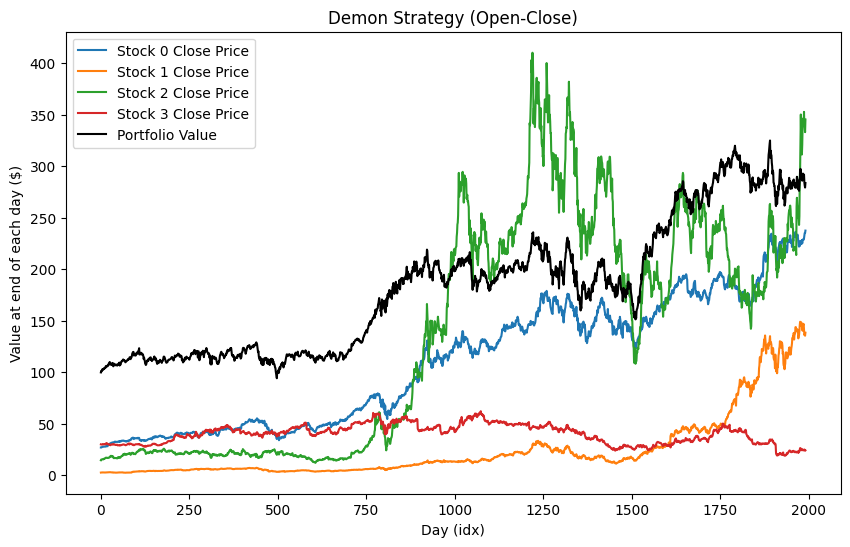

In [330]:
simulate_and_compare_strategies(BACKTEST_DATA_ALL)